In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])
df = df.set_index (['id', 'date'])
df

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,date,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [4]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Metadata:

>  - id - Unique ID for each home sold
>  - date - Date of the home sale
>  - price - Price of each home sold
>  - bedrooms - Number of bedrooms
>  - bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
>  - sqft_living - Square footage of the apartments interior living space
>  - sqft_lot - Square footage of the land space
>  - floors - Number of floors
>  - waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
>  - view - An index from 0 to 4 of how good the view of the property was
>  - condition - An index from 1 to 5 on the condition of the apartment,
>  - grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
>  - sqft_above - The square footage of the interior housing space that is above ground level
>  - sqft_basement - The square footage of the interior housing space that is below ground level
>  - yr_built - The year the house was initially built
>  - yr_renovated - The year of the house’s last renovation
>  - zipcode - What zipcode area the house is in
>  - lat - Lattitude
>  - long - Longitude
>  - sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
>  - sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Notice that some of these **features are somewhat correlated** (such as number of bedrooms and sqft)

## Mapping potential problems

- Using **different types of variables** complicates the decision of which distance metric is going to be used.
- Since there are a lot of variables, we should __only select a few to use__ on our model. This **helps with interpretability**, which is a key aspect of understanding our clusters.
    - Therefore, we're going to **use a classification method to select our most important variables** (supervised clustering).
    - Another alternative would be deciding alongside the business area.
    


# First part - Classification model

In [5]:
X = df.drop(['price', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
y = df.price
X

,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
id,date,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,1340,5650
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1690,7639
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,1933,2720,8062
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,1360,5000
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,1530,1509
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,1830,7200
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,1020,2007


In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=2021)
X_tr.shape, X_ts.shape

((15129, 13), (6484, 13))

Since we want to decide which variables are most important to the price prediction, we are going to **use a Tree model, that returns us the importance of each feature**.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_leaf_nodes': np.unique(np.logspace(2, 12, 20, base=2, dtype=int))
}

grid = GridSearchCV(
            DecisionTreeRegressor(criterion='mae', random_state=2021),
            params,
            scoring='neg_mean_absolute_error',
            cv=10,
            verbose=10,
            n_jobs=5)

grid.fit(X_tr, y_tr)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(criterion='mae',
                                             random_state=2021),
             n_jobs=5,
             param_grid={'max_leaf_nodes': array([   4,    5,    8,   11,   17,   24,   35,   51,   74,  106,  153,
        221,  318,  458,  660,  951, 1371, 1974, 2843, 4096])},
             scoring='neg_mean_absolute_error', verbose=10)

In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts, grid.predict(X_ts))

129532.53917334978

Although our model is not excellent, it is ok. The **most important thing**, here, is to **give us an idea as to what variables are most important** for the prediction.

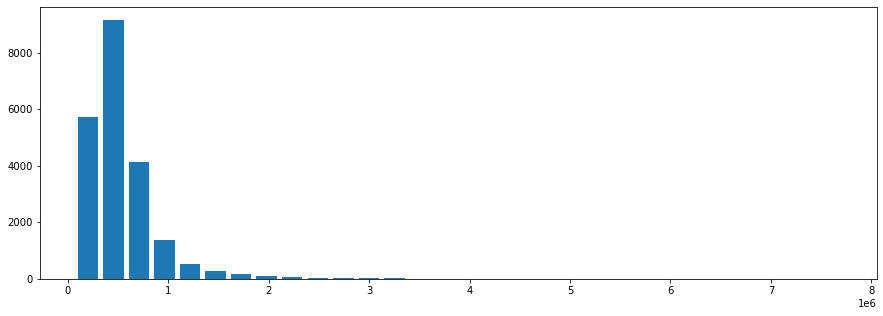

In [9]:
plt.figure(figsize=(15, 5))
plt.hist(y, bins=30, rwidth=.8);

The vast majority of apartments are priced between 0 and 1 million dollars.

In [10]:
grid.best_params_

{'max_leaf_nodes': 221}

In [11]:
y_ts.mean(), y_ts.median()

(536672.6566933992, 450000.0)

In [12]:
cols = X_tr.columns
imps = grid.best_estimator_.feature_importances_
order = np.argsort(imps)[::-1]

for col, imp in zip(cols[order], imps[order]):
    print(f'{col:20s} - {imp:5.3f}')

grade                - 0.493
sqft_living          - 0.169
yr_built             - 0.149
sqft_living15        - 0.063
sqft_lot15           - 0.051
view                 - 0.023
sqft_lot             - 0.018
sqft_above           - 0.014
bathrooms            - 0.009
bedrooms             - 0.005
waterfront           - 0.005
condition            - 0.002
floors               - 0.001


### Our most important features are:
- **grade**: level of construction and design
- **sqft_living**: square footage of living area
- **yr_built**: the year that the apartment was built

#### Other features presented extremely low importance values to justify their usage on our model (below 7%). Not only that, but "sqft_living15" and "sqft_lot15" are correlated to "sqft_living".

In [13]:
sel_cols = [
    'grade',
    'sqft_living',
    'yr_built'
]

X_tr[sel_cols]

,,grade,sqft_living,yr_built
id,date,,,
4167300310,2015-03-17,7,1920,1977
3179100055,2014-12-09,8,3700,1950
7896300592,2015-01-14,8,3390,2007
1370802650,2014-07-29,7,2660,1922
1336800880,2014-08-22,9,3780,1907
...,...,...,...,...
8121100255,2014-05-07,6,1500,1947
9532000170,2015-02-17,8,2190,2010
3021059155,2014-12-12,7,1220,1961


## Preliminary analysis

In [14]:
df_pa = df[sel_cols].copy()
df_pa

,,grade,sqft_living,yr_built
id,date,,,
7129300520,2014-10-13,7,1180,1955
6414100192,2014-12-09,7,2570,1951
5631500400,2015-02-25,6,770,1933
2487200875,2014-12-09,7,1960,1965
1954400510,2015-02-18,8,1680,1987
...,...,...,...,...
263000018,2014-05-21,8,1530,2009
6600060120,2015-02-23,8,2310,2014
1523300141,2014-06-23,7,1020,2009


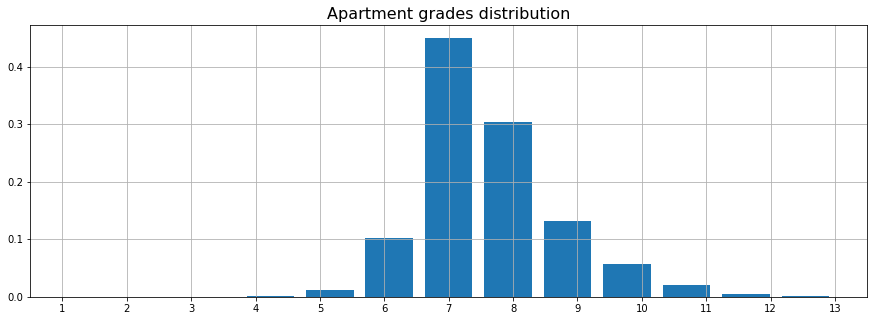

In [34]:
plt.figure(figsize=(15, 5))
plt.hist(df_pa.grade, bins= 13, rwidth=.8, density=True)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.title('Apartment grades distribution', fontsize=16)
plt.grid();

In [47]:
df_pa.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

- Over 40% of the apartments received a 7 grade, therefore have an average level of construction and design.
- About 12% of our database was given a below average grade (4-6).
- A little bit over 20% of the ranked apartments were graded as luxurious or stylish (given grades from 9-13).
- We had a few apartments graded at the edges (so grades 1-3 and 12-13).

#### Hypotheseses:
- There will probably be a **great disparity of apartment prices** (given the variance of grades).
- There will probably **be a cluster for lower graded apartments** (potentially cheaper) **and one for higher graded apartments** (potentially more expensive).
- The **average graded apartments will probably be part of the bigger cluster(s)**.


In [56]:
df_yr = pd.DataFrame(df_pa.yr_built.value_counts())
df_yr['year'] = df_yr.index
df_yr = df_yr.rename(columns={'yr_built': 'number_apartments'})
df_yr.sort_values(by=['year'])

,number_apartments,year
1900,87,1900
1901,29,1901
1902,27,1902
1903,46,1903
1904,45,1904
...,...,...
2011,130,2011
2012,170,2012
2013,201,2013
2014,559,2014


In [73]:
df_yrf = df_yr.groupby((df_yr.year//10)*10).sum()
df_yrf = df_yrf.drop('year', axis=1)
df_yrf

,number_apartments
year,
1900,645
1910,2716
1920,1192
1930,530
1940,1764
1950,2452
1960,2660
1970,2285
1980,2282


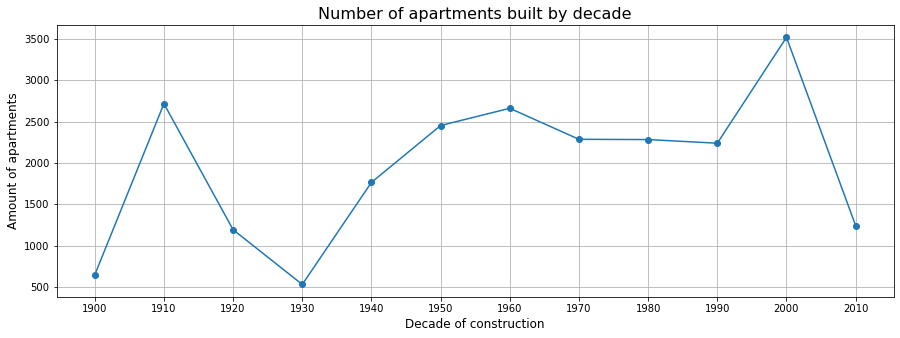

In [94]:
Year = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
Num_Apartments = [645, 2716, 1192, 530, 1764, 2452, 2660, 2285, 2282, 2238, 3518, 1241]

plt.figure(figsize=(15, 5))
plt.plot(Year, Num_Apartments, marker='o')
plt.title('Number of apartments built by decade', fontsize=16)
plt.xticks(Year)
plt.xlabel('Decade of construction', fontsize=12)
plt.ylabel('Amount of apartments', fontsize=12)
plt.grid()

- During the **1900s the number of apartments built was extremely low**, this was probably aggravated by the **Panic of 1901 and 1907**, as well as the fact that **not as many people lived in cities**.
- In the **1930s there was a massive decrease in the number of apartments built**, this was probably caused by the **Great Depression in 1929**.
- In the **2000s there was a great increase in the real state market**, probably caused by **urbanization**.
- In the **2010s there was a decrease in the number of apartments built**, this was probably aggravated by the **Great Recession (2007-2009)**.

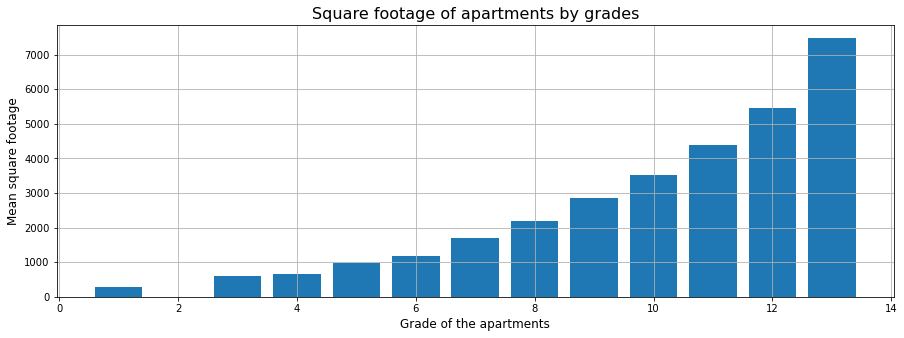

In [111]:
df_sq = df_pa.copy()
df_sqf = df_sq.groupby(by=['grade']).mean().drop('yr_built', axis=1)
df_sqf['grade'] = df_sqf.index
Grade = []
Sqft_living = []
for el in df_sqf.grade:
    Grade.append(el)
for em in df_sqf.sqft_living:
    Sqft_living.append(em)
plt.figure(figsize=(15, 5))
plt.bar(Grade, Sqft_living)
plt.title('Square footage of apartments by grades', fontsize=16)
plt.xlabel('Grade of the apartments', fontsize=12)
plt.ylabel('Mean square footage', fontsize=12)
plt.grid()

As expected, the **grade of the apartment has a direct correlation to the square footage of the living area**.

# Second part - Clustering model

## Scaling our variables

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr[sel_cols], y_tr)

X_tr_s = pd.DataFrame(scaler.transform(X_tr[sel_cols]), index=X_tr.index, columns=sel_cols)
X_ts_s = pd.DataFrame(scaler.transform(X_ts[sel_cols]), index=X_ts.index, columns=sel_cols)

X_tr_s

,,grade,sqft_living,yr_built
id,date,,,
4167300310,2015-03-17,-0.566656,-0.180510,0.201218
3179100055,2014-12-09,0.282738,1.758213,-0.715134
7896300592,2015-01-14,0.282738,1.420571,1.219386
1370802650,2014-07-29,-0.566656,0.625476,-1.665425
1336800880,2014-08-22,1.132133,1.845347,-2.174509
...,...,...,...,...
8121100255,2014-05-07,-1.416050,-0.637962,-0.816951
9532000170,2015-02-17,0.282738,0.113566,1.321203
3021059155,2014-12-12,-0.566656,-0.942929,-0.341806


## Choosing the number of clusters

In [16]:
from sklearn.cluster import KMeans

n_clusts = range(2, 21)
inercias = []
for element in n_clusts:
    print(element)
    km = KMeans(n_clusters=element, n_init=200, max_iter=3000)
    km.fit(X_tr_s)
    inercias.append(km.inertia_)

inercias

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


[26260.151012505754,
 18222.556932713866,
 15567.612150638759,
 13201.489567515764,
 11465.196820737241,
 10278.804442780744,
 9409.22489017508,
 8635.80742009381,
 7986.4992648441075,
 7419.188463220866,
 6903.437909454813,
 6436.31669313719,
 6097.598168750772,
 5798.336914683986,
 5512.984692727579,
 5233.50416552623,
 4984.741550002018,
 4790.808308820411,
 4604.937661001445]

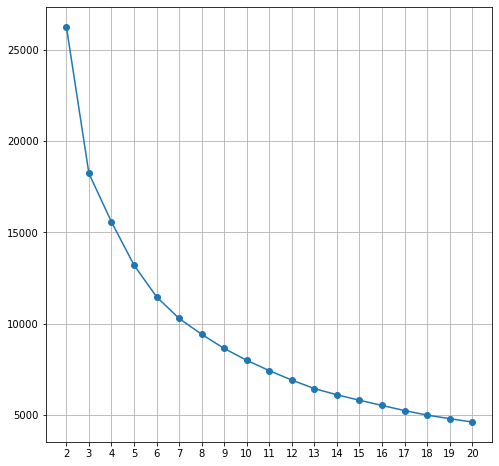

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(n_clusts, inercias, 'o-')
plt.xticks(n_clusts)
plt.grid()

Note that the **elbow point is not extremely clear**. The ideal **number of clusters chosen was 5**.

In [18]:
n_clus = 5
km = KMeans(n_clusters=n_clus, n_init=200, max_iter=3000, random_state=2021)
km.fit(X_tr_s)

X_tr_clus = X_tr.copy()
X_ts_clus = X_ts.copy()

X_tr_clus = X_tr_clus.join(y_tr)
X_ts_clus = X_ts_clus.join(y_ts)

X_tr_clus.loc[:, 'cluster'] = km.predict(X_tr_s)
X_ts_clus.loc[:, 'cluster'] = km.predict(X_ts_s)

X_tr_clus

,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price,cluster
id,date,,,,,,,,,,,,,,,
4167300310,2015-03-17,3,1.75,1920,11340,1.0,0,0,4,7,1230,1977,1980,9638,324500.0,3
3179100055,2014-12-09,5,3.50,3700,8504,2.0,0,0,3,8,2750,1950,2370,6246,1295000.0,2
7896300592,2015-01-14,6,4.50,3390,7200,2.0,0,0,3,8,2440,2007,2040,7214,303500.0,0
1370802650,2014-07-29,3,2.00,2660,4500,1.0,0,0,4,7,1330,1922,1790,5000,605000.0,2
1336800880,2014-08-22,4,2.25,3780,5160,2.0,0,0,4,9,2510,1907,2740,5160,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121100255,2014-05-07,3,1.75,1500,6180,1.0,0,0,4,6,1060,1947,1740,6180,440000.0,1
9532000170,2015-02-17,4,2.50,2190,3855,2.0,0,0,3,8,2190,2010,2190,3600,540000.0,0
3021059155,2014-12-12,3,1.00,1220,6000,1.0,0,0,5,7,1220,1961,1420,13137,161500.0,1


## Interpreting the clusters

In [19]:
vcdf = {'cluster': [3, 1, 0, 2, 4], 
        'total value': X_ts_clus.cluster.value_counts(), 
        'percentual value': X_ts_clus.cluster.value_counts(normalize=True)*100}
number_clus = pd.DataFrame(vcdf)
number_clus = number_clus.set_index(number_clus.cluster)
number_clus = number_clus.drop('cluster', axis=1)
number_clus

,total value,percentual value
cluster,,
3,2046,31.554596
1,1700,26.218384
0,1275,19.663788
2,981,15.129550
4,482,7.433683


Although cluster number 4 is considerably smaller than the others, the **clusters sizes are reasonable**.

In [20]:
def q05(grp):
    return grp.quantile(0.05)
def q95(grp):
    return grp.quantile(0.95)

X_ts_clus.groupby('cluster')[sel_cols+['price']].agg([q05, 'median', q95, 'mean'])

grade                       sqft_living                            \
          q05 median q95       mean         q05 median   q95         mean   
cluster                                                                     
0           8      9  10   8.542745     2010.00   2660  3490  2694.454118   
1           5      7   7   6.550000      740.00   1260  1860  1284.464118   
2           7      8   9   7.697248     1680.00   2320  3280  2405.449541   
3           7      7   8   7.328935     1062.75   1680  2240  1672.253177   
4           9     10  12  10.205394     3090.00   3925  5960  4144.491701   

        yr_built                               price                        \
             q05 median   q95         mean       q05     median        q95   
cluster                                                                      
0        1974.00   1998  2014  1995.643137  331728.0   593567.0  1078600.0   
1        1907.95   1946  1963  1941.022941  168325.0   350500.0   660250.0   
2        1908.00   1952  1968  1944.950051  295000.0   624900.0  1225000.0   
3        1966.00   1986  2010  1987.611926  210250.0   362000.0   601875.0   
4        1951.00   1998  2013  1992.041494  580495.0  1049500.0  2697055.0   

                       
                 mean  
cluster                
0        6.303476e+05  
1        3.717699e+05  
2        6.579095e+05  
3        3.824158e+05  
4        1.278530e+06

### Portraying our clusters:

### Cluster 0 - Cool and new
Stylish, big, new and medium priced apartments
- Grade between 8 and 10
- Sqft_living between 2010 and 3490 square feet (median=2660 square feet)
- Yr_built between 1974 and 2014, but most apartments were built before 2000
- Price range: 331 thousand - 1.07M dollars (median=593 thousand dollars)

### Cluster 1 - Minimalist
Simple, small, old and cheap apartments
- Grade between 5 and 7
- Sqft_living between 740 and 1860 square feet (median=1260 square feet)
- Yr_built between 1907 and 1963, but most apartments were built before 1950
- Price range: 168 thousand - 660 thousand dollars (median=350 thousand dollars)

### Cluster 2 - Average
Intermediate (regarding style and size), old and widely varied in price apartments
- Grade between 7 and 9
- Sqft_living between 1680 and 3280 square feet (median=2320 square feet)
- Yr_built between 1908 and 1968, but most apartments were built before 1955
- Price range: 295 thousand - 1.2M dollars (median=624 thousand dollars)

### Cluster 3 - Efficient
Intermediate (regarding style), small, somewhat new and cheap apartments
- Grade between 7 and 8
- Sqft_living between 1062 and 2240 square feet (median=1680 square feet)
- Yr_built between 1966 and 2010, but most apartments were built before 1990
- Price range: 210 thousand - 601 thousand dollars (median=362 thousand dollars)

### Cluster 4 - Top of the crop
Luxurious, stylish, enormous, new and expensive apartments
- Grade between 9 and 12
- Sqft_living between 3090 and 5960 square feet (median=3925 square feet)
- Yr_built between 1951 and 2013, but most apartments were built before 2000
- Price range: 580 thousand - 2.69M (median=1.04M dollars)

<AxesSubplot:title={'center':'price'}, xlabel='cluster'>

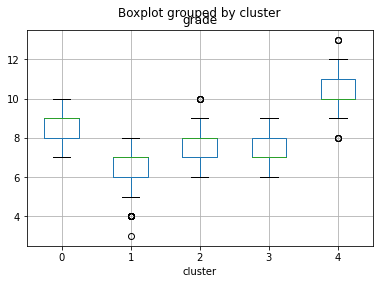

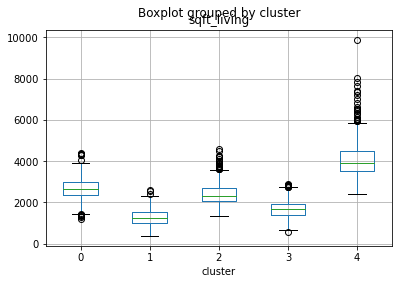

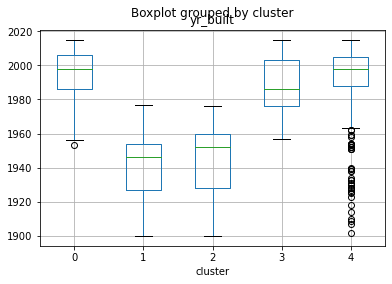

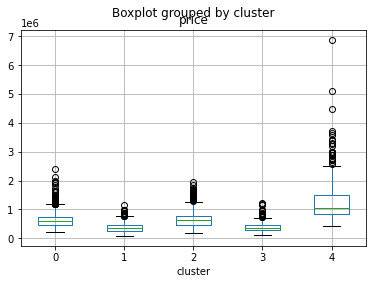

In [21]:
for col in X_ts_clus.drop('cluster', axis=1)[sel_cols]:
    X_ts_clus.boxplot(column=col, by='cluster')
X_ts_clus.boxplot(column='price', by='cluster')

### Interpreting based on variables that were not used to determine our clusters

In [22]:
df_clus = df.copy()
df_clus.loc[:, 'cluster'] = km.predict(scaler.transform(df_clus[sel_cols]))
df_clus

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cluster
id,date,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,3
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,3


Observing our clusters based on **number of bathrooms**:

In [23]:
df_clus.groupby('cluster').bathrooms.mean()

cluster
0    2.610602
1    1.321855
2    2.197730
3    2.114722
4    3.304859
Name: bathrooms, dtype: float64

__Top of the crop__ cluster has in fact more bathrooms and __Minimalist__ apartments have less bathrooms (on average).

Observing our clusters based on **latitude and longitude**:

0
1
2
3
4


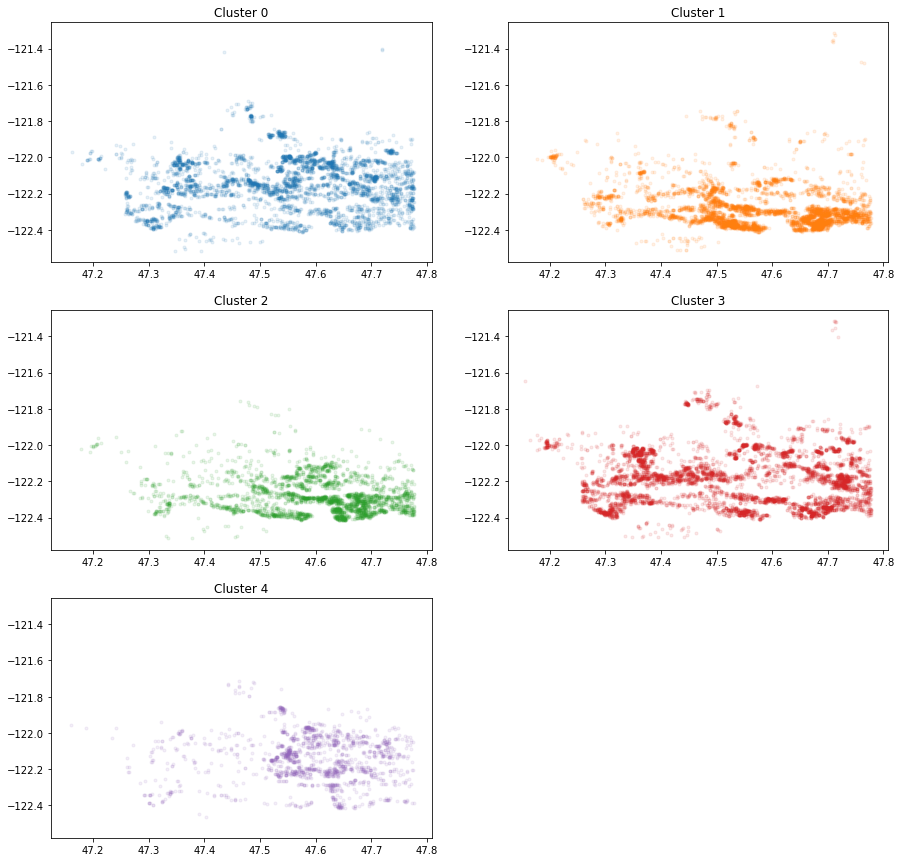

In [24]:
plt.figure(figsize=(15, 15))
for num, clus in enumerate(np.sort(X_ts_clus.cluster.unique())):
    print(num)
    if num == 0:
        ax = plt.subplot(3, 2, num+1)
    else:
        plt.subplot(3, 2, num+1, sharex=ax, sharey=ax)
    X_ = df_clus.loc[df_clus.cluster==clus].copy()
    plt.title(f'Cluster {num}')
    plt.plot(X_.lat, X_.long, '.', color=f'C{num}', alpha=.1)

With these graphs we can see the **physical distributions of apartments** of each cluster. Given these images, we can conclude that:
- Cluster 0 (Cool and new) is widely spread in the city, but mainly occupy the **North** part.
- Cluster 1 (Minimalist) is concentrated in the **South** part of the city.
- Cluster 2 (Average) is concentrated in the **Southeast** part of the city.
- Cluster 3 (Efficient) is **widely spread** in the city.
- Cluster 4 (Top of the crop) is mostly concentrated in the **Center (Downtown) and the Northeast** part of the city.